## Lab | Feature extraction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df_data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
col_names=df_data.columns.values.tolist() # create a list with column names

In [4]:
for col in range(len(col_names)):
    col_names[col]=col_names[col].lower()
    col_names[col]=col_names[col].replace(" ", "_") # replace blanks with underscores and convert all the letters to lowercase

In [5]:
for i in range(len(col_names)):
    df_data.rename(columns={df_data.columns.values[i]:col_names[i]},inplace=True) # rename the columns

In [6]:
df_data.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


### Instructions

   ##### 1. Open the categoricals variable we created before.
        categoricals = data.select_dtypes(np.object)
        categoricals.head()


In [7]:
categoricals = df_data.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2.Plot all the categorical variables with the proper plot. What can you see?


In [8]:
for i in categoricals:
    val=categoricals[i].value_counts()
    print(val)

WN69789    1
FM31768    1
JX93039    1
QN37451    1
KE61355    1
          ..
MM83308    1
WH80404    1
QF21628    1
JH58573    1
CS93971    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/21/11    160
1/2/11     160
1/29/11    160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11   

* We are not going to plot the 'customer' column as all the customer have a different id.

In [9]:
cat_col=list(categoricals.columns)
cat_col

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [10]:
cat_col_plot=cat_col[1:5]+cat_col[6:]
cat_col_plot # here we drop the 'customer' from the columns to plot and we do the same for the "effective_to_date" column, 
             # which will be separately plotted later

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

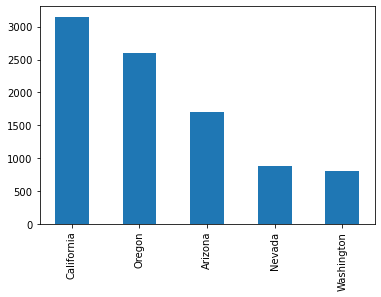

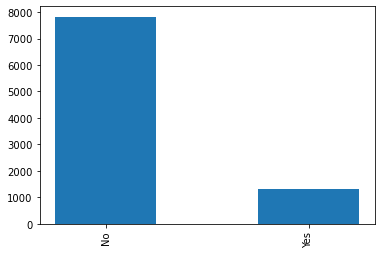

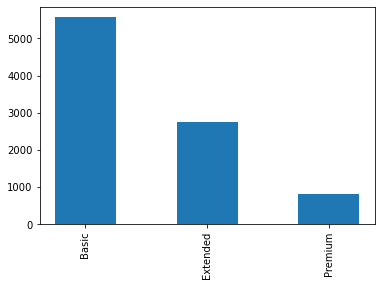

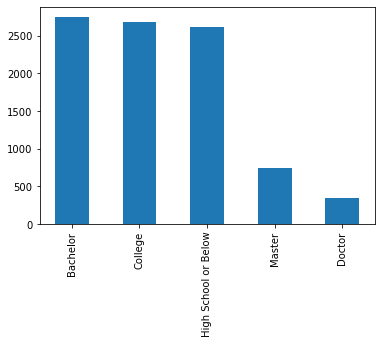

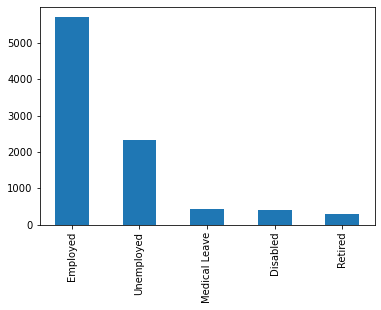

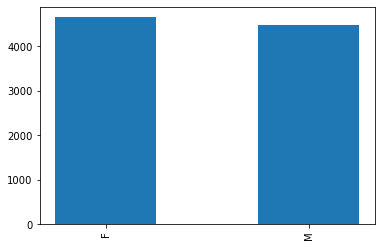

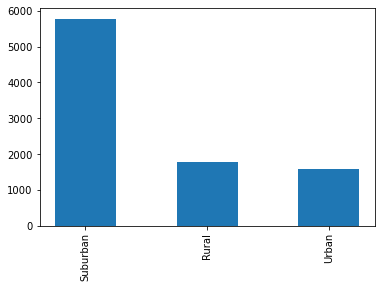

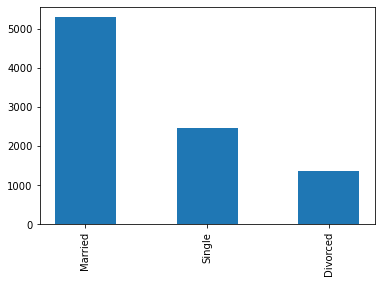

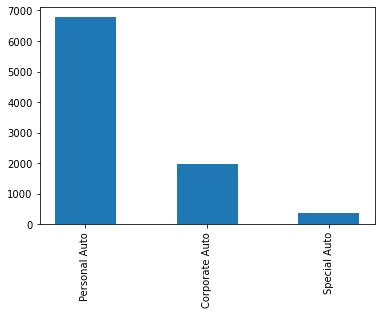

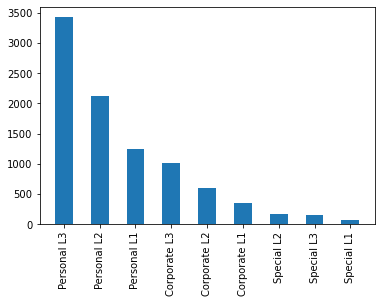

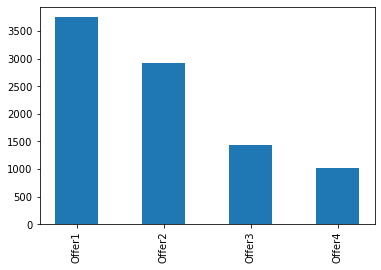

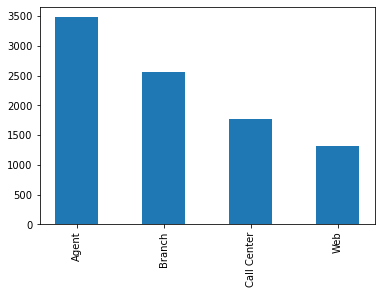

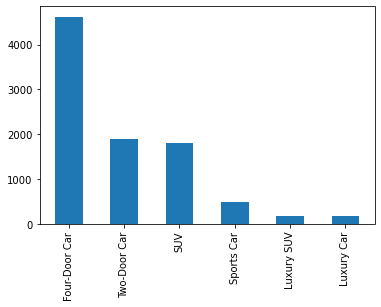

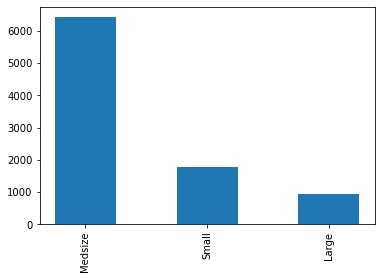

In [11]:
for i in cat_col_plot:
    categories = categoricals[i].value_counts().index
    counts = categoricals[i].value_counts().values
    plt.bar(categories, counts, width=0.5)
    plt.xticks(rotation=90)
    plt.show()
    
    


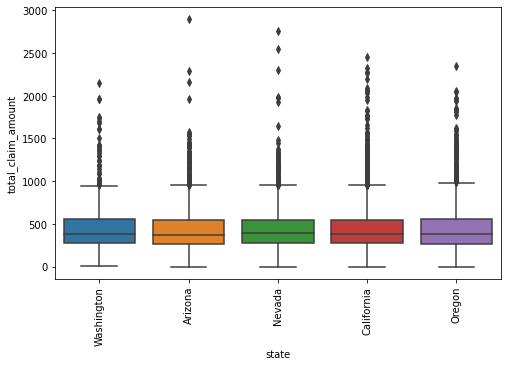

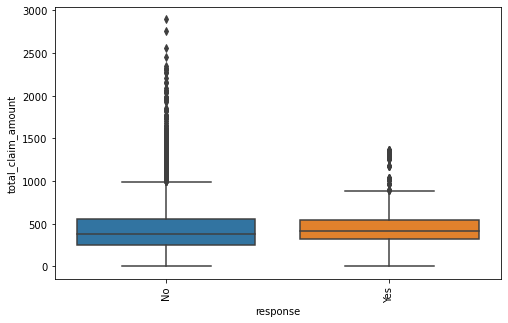

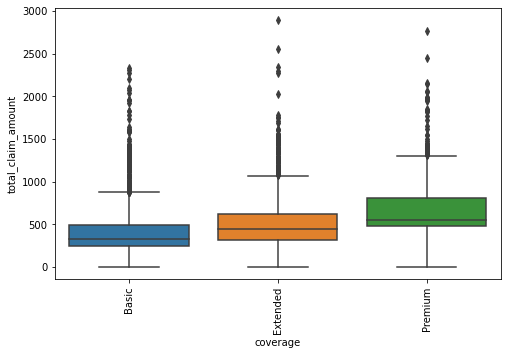

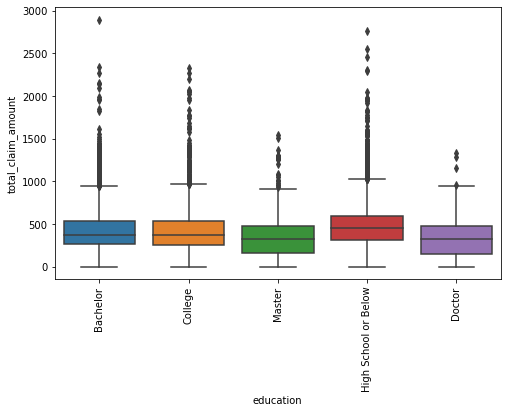

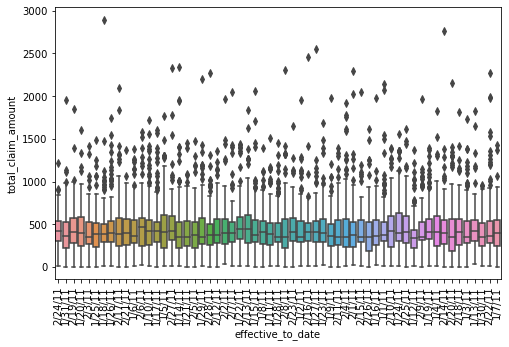

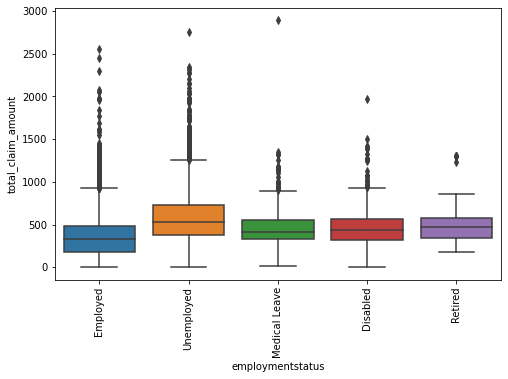

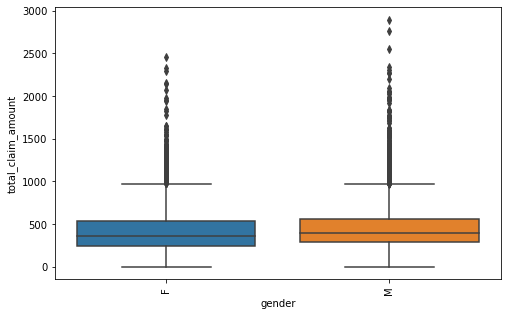

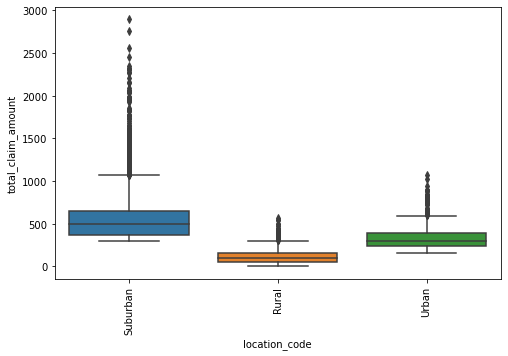

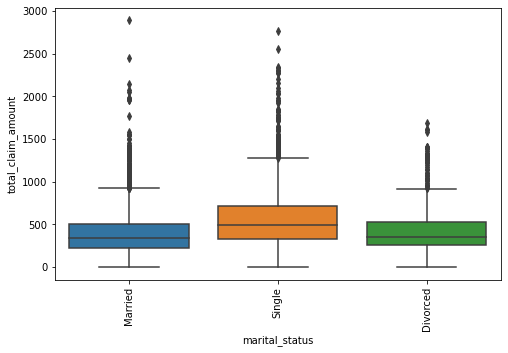

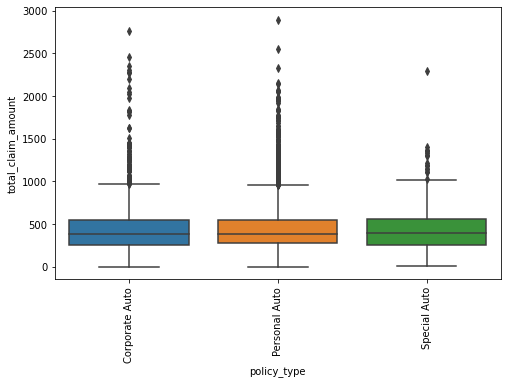

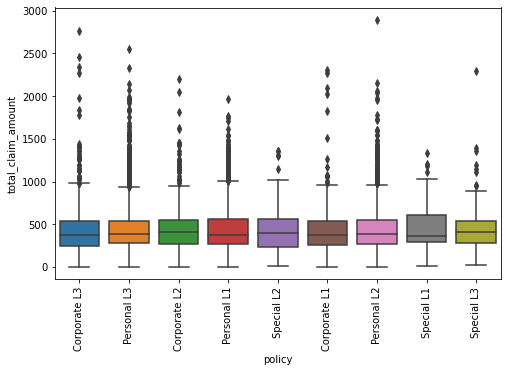

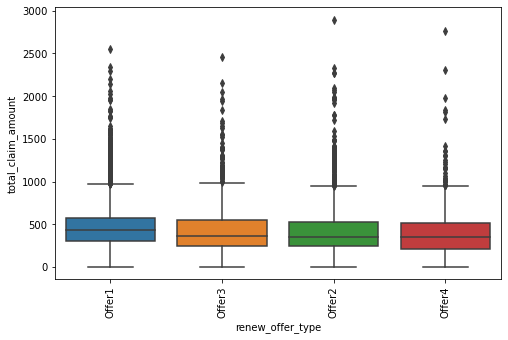

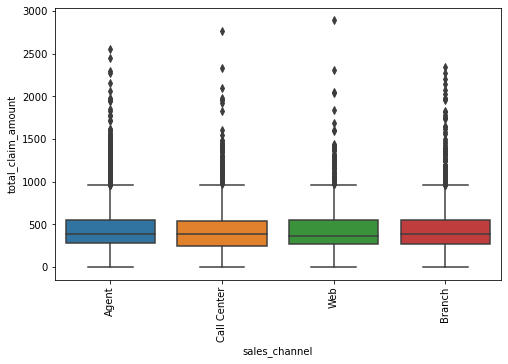

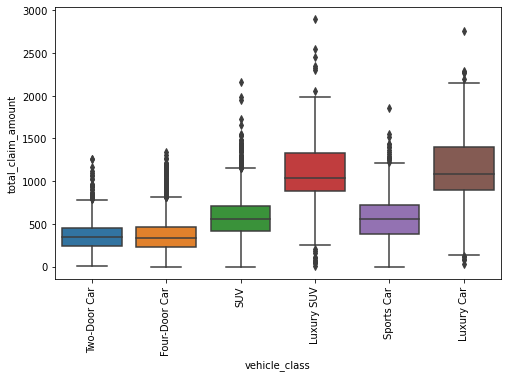

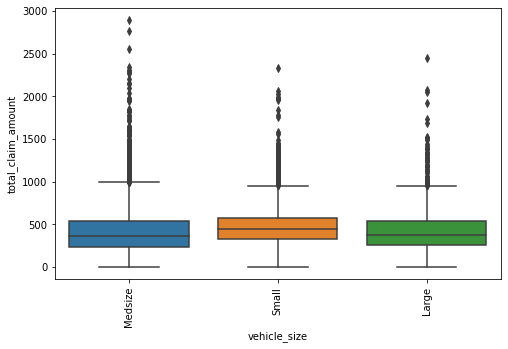

In [12]:
for col in categoricals:
    if col != 'customer':
        plt.figure(figsize=(8,5))
        sb.boxplot(x=categoricals[col], y=df_data['total_claim_amount'])
        plt.xticks(rotation=90)
        plt.show()

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [13]:
redundant=['policy','policy_type']
categoricals_policy=categoricals[redundant]
categoricals_policy.value_counts()

policy        policy_type   
Personal L3   Personal Auto     3426
Personal L2   Personal Auto     2122
Personal L1   Personal Auto     1240
Corporate L3  Corporate Auto    1014
Corporate L2  Corporate Auto     595
Corporate L1  Corporate Auto     359
Special L2    Special Auto       164
Special L3    Special Auto       148
Special L1    Special Auto        66
dtype: int64

In [14]:
categoricals_policy['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

**In this case the column "policy" provide the same information as the "policy_type" column but we further detail, so we will just keep the column "policy"**

In [15]:
categoricals.drop(columns='policy_type',inplace=True)

In [16]:
categoricals.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize


#### 4. Plot time variable. Can you extract something from it?

In [17]:
categoricals.effective_to_date.value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
2/27/11    167
1/5/11     167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/21/11    160
1/2/11     160
1/29/11    160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
1/18/11    154
2/1/11     154
1/15/11    153
1/14/11    152
1/7/11     151
2/11/11    151
1/25/11    151
2/2/11     149
2/18/11    149
2/25/11    149
1/8/11     149
2/21/11    148
1/1/11     148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
2/23/11    143
1/6/11     143
1/16/11    142
2/16/11    139
2/24/11    139
2/13/11    139
2/9/11     137
1/22/11    136
2/17/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

 * We will filter by month as the year is always 2011 and we will check the distribution.

In [18]:
categoricals['effective_to_date'].dtypes

dtype('O')

In [19]:
categoricals['effective_to_date'] = categoricals.apply(lambda x: categoricals['effective_to_date'].str[0])

In [20]:
categoricals['effective_to_date'].value_counts() # we just have ocurrences in January and February

1    4898
2    4236
Name: effective_to_date, dtype: int64

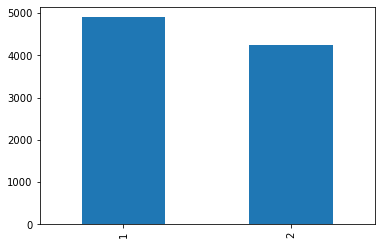

In [21]:
categoricals['effective_to_date'].value_counts().plot.bar();

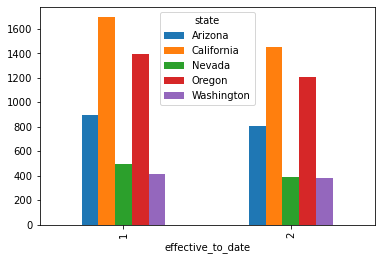

In [22]:
categoricals.groupby('state').effective_to_date.value_counts().unstack(0).plot.bar()
plt.show();

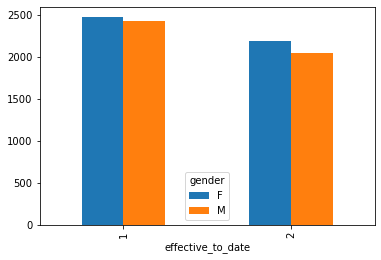

In [23]:
categoricals.groupby('gender').effective_to_date.value_counts().unstack(0).plot.bar()
plt.show();

In [24]:
categoricals['effective_to_date']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: effective_to_date, Length: 9134, dtype: object

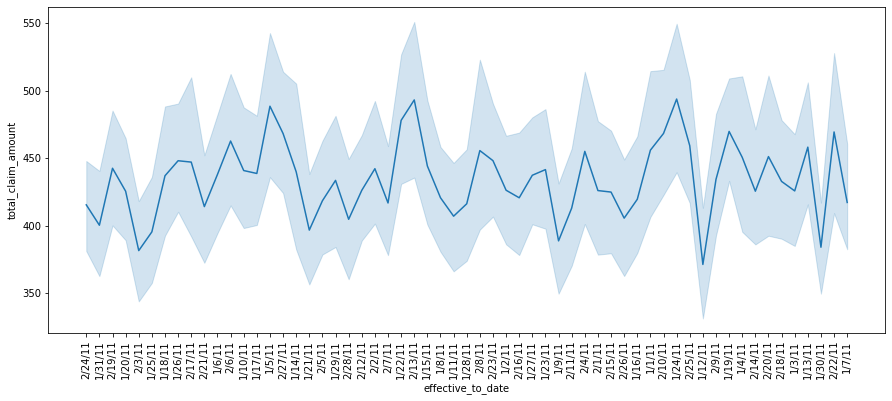

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
sb.lineplot(df_data['effective_to_date'], df_data['total_claim_amount'] )
plt.xticks(rotation=90)
plt.show();